In [24]:
from sklearn.datasets import fetch_openml
letters_db = fetch_openml('letter', version=1)
letters_db.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [50]:
print(letters_db.feature_names)

['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']


0.0

In [29]:
x = letters_db.data
y = letters_db.target
print(len(y))
print(y)

20000
['Z' 'P' 'S' ... 'O' 'L' 'Q']


In [35]:
from sklearn.model_selection import train_test_split
TEST_LEN = len(y) * 0.2
TRAIN_LEN = len(y) - TEST_LEN
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [60]:
# lets start with a binary classifier, which finds the letter Z
y_train_z = y_train == "Z"
y_test_z = y_test == "Z"

In [51]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_z)

SGDClassifier(random_state=42)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_z, cv=3)
print(confusion_matrix(y_train_z, y_train_pred))

print(precision_score(y_train_z, y_train_pred))

print(recall_score(y_train_z, y_train_pred) )
print(f1_score(y_train_z, y_train_pred))


[[14363    71]
 [  197   369]]
0.8386363636363636
0.6519434628975265
0.7335984095427436


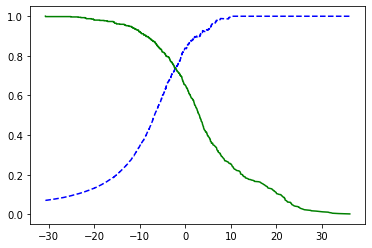

In [76]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_z, cv=3,
method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_z, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.show()

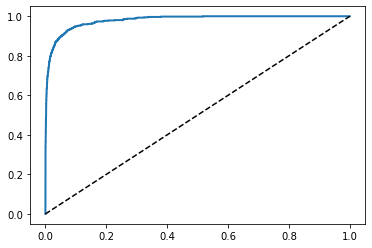

In [79]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_z, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plot_roc_curve(fpr, tpr)
plt.show()

In [101]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn_clf = KNeighborsClassifier()
print(y_train)
knn_clf.fit(x_train, y_train)

['J' 'B' 'D' ... 'X' 'I' 'I']


KNeighborsClassifier()

In [105]:
y_test_pred = knn_clf.predict(x_test)
print(confusion_matrix(y_test, y_test_pred))


[[192   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   1
    0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   4
    1   0   0   0   0   0   0   0]
 [  0   0 178   0   1   0   1   0   0   0   0   0   0   0   1   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 207   0   0   0   3   0   0   0   0   0   1   0   0   1   1
    0   0   0   0   0   1   0   0]
 [  0   1   1   0 182   0   1   0   0   0   1   0   0   0   0   0   1   0
    2   0   0   0   0   2   0   2]
 [  0   1   0   1   1 182   0   1   0   0   0   0   0   2   0   8   0   0
    0   1   0   0   1   0   0   0]
 [  0   2   1   1   1   0 179   0   0   0   0   0   0   0   1   0   0   3
    0   0   0   0   2   0   0   0]
 [  0   9   0   5   0   0   1 161   0   0   6   1   0   0   1   0   0   3
    0   0   0   0   0   0   0   0]
 [  0   0   1   1   0   2   0   0 192   6   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  0   0   0   0  

In [108]:
from sklearn.metrics import accuracy_score
print(y_test[:100])
print(y_test_pred[0:100])

['K' 'I' 'I' 'O' 'T' 'D' 'Y' 'N' 'X' 'E' 'J' 'J' 'F' 'W' 'T' 'H' 'A' 'T'
 'D' 'U' 'S' 'K' 'H' 'M' 'I' 'N' 'J' 'U' 'T' 'K' 'L' 'Y' 'J' 'X' 'I' 'F'
 'N' 'A' 'N' 'K' 'L' 'N' 'S' 'J' 'P' 'D' 'U' 'C' 'D' 'E' 'D' 'N' 'L' 'R'
 'R' 'I' 'F' 'R' 'W' 'A' 'R' 'E' 'X' 'S' 'Q' 'F' 'U' 'R' 'R' 'I' 'M' 'Q'
 'C' 'J' 'I' 'V' 'L' 'S' 'O' 'H' 'S' 'O' 'F' 'H' 'D' 'Z' 'T' 'O' 'L' 'K'
 'E' 'C' 'H' 'P' 'G' 'G' 'B' 'H' 'G' 'S']
['K' 'I' 'I' 'G' 'T' 'D' 'Y' 'N' 'X' 'E' 'J' 'J' 'F' 'W' 'T' 'H' 'A' 'T'
 'D' 'U' 'S' 'K' 'H' 'M' 'I' 'N' 'J' 'U' 'T' 'K' 'L' 'Y' 'J' 'X' 'I' 'F'
 'N' 'A' 'N' 'K' 'L' 'N' 'S' 'I' 'P' 'D' 'U' 'C' 'D' 'E' 'D' 'N' 'L' 'R'
 'R' 'I' 'F' 'R' 'W' 'A' 'R' 'E' 'X' 'S' 'Q' 'F' 'U' 'B' 'R' 'I' 'M' 'Q'
 'C' 'J' 'I' 'V' 'L' 'S' 'O' 'H' 'S' 'O' 'F' 'H' 'D' 'Z' 'T' 'O' 'L' 'K'
 'E' 'C' 'B' 'P' 'G' 'G' 'B' 'H' 'G' 'S']


In [112]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_neighbors': [1, 5, 10, 20], 'weights': ["uniform", "distance"]}]
forest_reg = KNeighborsClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='f1_macro',
return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 5, 10, 20],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='f1_macro')

In [120]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}